preparing the data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Load the data (replace with actual file paths if needed)
mouse_metadata = pd.read_csv(r'C:\Users\preit\OneDrive\Desktop\matpotlib_challenge\Mouse_metadata.csv')
study_results = pd.read_csv(r'C:\Users\preit\OneDrive\Desktop\matpotlib_challenge\Study_results.csv')


prepare the datatable of mouse_metadata and study_results

In [2]:
print(mouse_metadata.head())
print(study_results.head())

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


# Merge the two DataFrames on Mouse ID

In [3]:
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')



# Display the first few rows to check the merged data

In [4]:

merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


identifying and removing duplicates

In [5]:
# Check for duplicate time points for any Mouse ID
duplicates = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the duplicate data
print(duplicates)

# Remove the duplicates
cleaned_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

number of unique mice id

In [6]:
# Check the number of unique mice IDs
unique_mice = merged_df["Mouse ID"].nunique()
print(f"Number of unique mice IDs: {unique_mice}")


Number of unique mice IDs: 249


cleaned dataframe

In [7]:
 # Remove the duplicate mouse data
cleaned_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
print(cleaned_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

summary statistics

In [8]:
# Group the data by 'Drug Regimen' and calculate the summary statistics
summary_stats = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
# Group the data by 'Drug Regimen' and calculate the summary statistics
summary_stats = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",       # Calculate mean
    median="median",   # Calculate median
    variance="var",    # Calculate variance
    std_dev="std",     # Calculate standard deviation
    sem="sem"          # Calculate standard error of the mean
)

# Display the summary statistics table
print(summary_stats)



                   mean     median   variance   std_dev       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [9]:
# Using the aggregation method to produce the summary statistics in a single line
summary_stats_advanced = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    ['mean', 'median', 'var', 'std', 'sem']
)

# Display the resulting summary statistics table
print(summary_stats_advanced)


                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


bar chart 1 by using panda

<Axes: title={'center': 'Number of Mice per Drug Regimen'}, xlabel='Drug Regimen'>

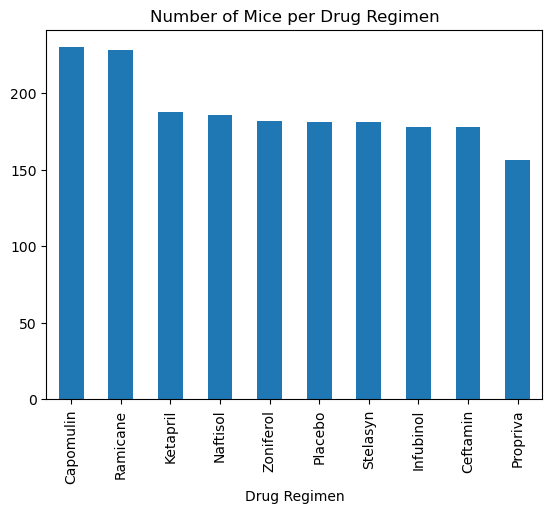

In [10]:
# Count the number of mice in each drug regimen
drug_counts = cleaned_df['Drug Regimen'].value_counts()

# Plot bar chart using pandas
drug_counts.plot(kind='bar', title='Number of Mice per Drug Regimen')


barchart 2 by using matplotlib

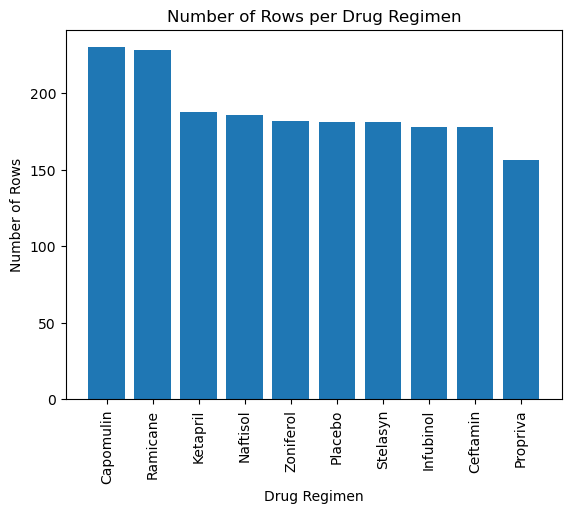

In [11]:
# Generate the second bar chart (using Matplotlib)
drug_counts = cleaned_df["Drug Regimen"].value_counts()
plt.bar(drug_counts.index, drug_counts.values)
plt.title('Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=90)
plt.show()



piechart 1 using pandas

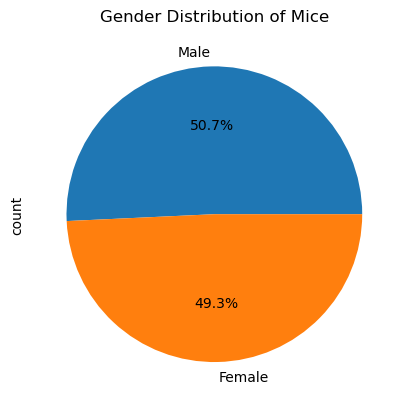

In [12]:
# Count the number of male and female mice
gender_counts = cleaned_df['Sex'].value_counts()

# Create pie chart using pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution of Mice')
plt.show()


piechart 2 using matplotlib

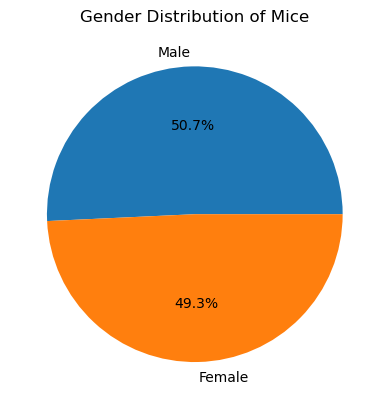

In [13]:
# Create pie chart using matplotlib
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Mice')
plt.show()


Quartiles, Outliers, and Box Plot

In [14]:
# Filter for the most promising treatment regimens
promising_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volumes = cleaned_df[cleaned_df["Drug Regimen"].isin(promising_treatments)]

# Group by 'Drug Regimen' and get the last time point for each mouse
last_time_point = final_tumor_volumes.groupby("Mouse ID")["Timepoint"].max()
last_time_point_df = final_tumor_volumes[final_tumor_volumes["Timepoint"].isin(last_time_point.values)]

# Calculate quartiles and IQR for each treatment
tumor_data = []
for drug in promising_treatments:
    drug_data = last_time_point_df[last_time_point_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_data.append(drug_data)

# Calculate quartiles and IQR
quartiles = [np.percentile(data, [25, 50, 75]) for data in tumor_data]
IQR = [q[2] - q[0] for q in quartiles]

# Determine potential outliers
lower_bounds = [q[0] - 1.5 * iqr for q, iqr in zip(quartiles, IQR)]
upper_bounds = [q[2] + 1.5 * iqr for q, iqr in zip(quartiles, IQR)]

# Identify outliers for each regimen
outliers = {}
for idx, drug in enumerate(promising_treatments):
    drug_data = last_time_point_df[last_time_point_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    outliers[drug] = drug_data[(drug_data < lower_bounds[idx]) | (drug_data > upper_bounds[idx])]

# Display outliers
print(outliers)


NameError: name 'np' is not defined

Box Plot with Outliers Highlighted

C:\Users\preit\AppData\Local\Temp\ipykernel_23304\677847718.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(tumor_data, vert=True, patch_artist=True, labels=promising_treatments)


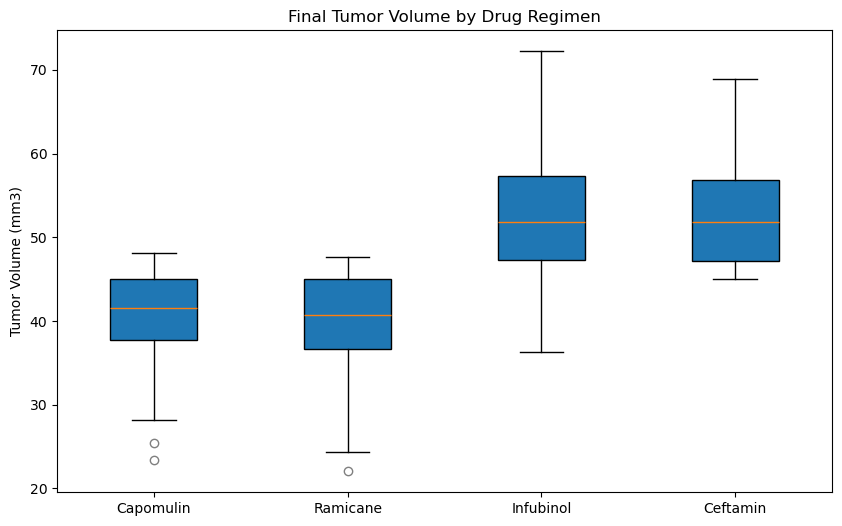

In [127]:
# Generate a box plot to visualize the tumor volumes and highlight outliers
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot(tumor_data, vert=True, patch_artist=True, labels=promising_treatments)

# Change color for outliers
for flier in box_plot['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)

plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


Line Plot for a Mouse in Capomulin

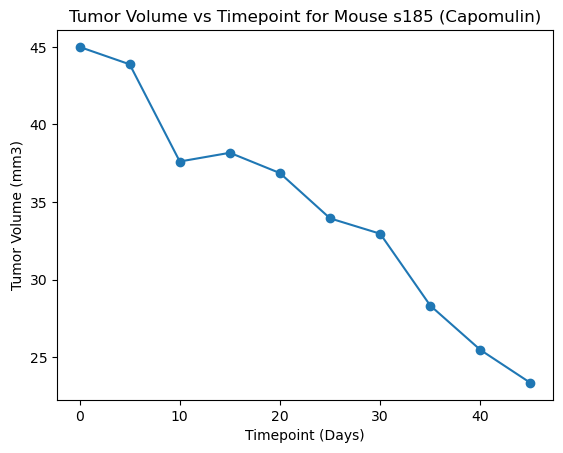

In [128]:

# Select a mouse treated with Capomulin
mouse_id = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]["Mouse ID"].iloc[0]

# Filter the data for that mouse
mouse_data = cleaned_df[cleaned_df["Mouse ID"] == mouse_id]

# Generate the line plot for tumor volume versus timepoint
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o')
plt.title(f'Tumor Volume vs Timepoint for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

Scatter Plot for Weight vs. Tumor Volume (Capomulin Treatment)

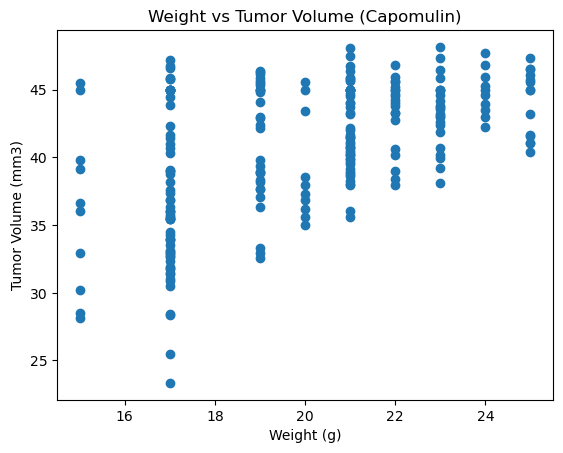

In [19]:
# Filter data for Capomulin regimen
capomulin_data = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]

# Generate the scatter plot for weight vs. tumor volume
plt.scatter(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])
plt.title('Weight vs Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

Calculate Correlation and Linear Regression

Correlation coefficient: 0.5256995552077166


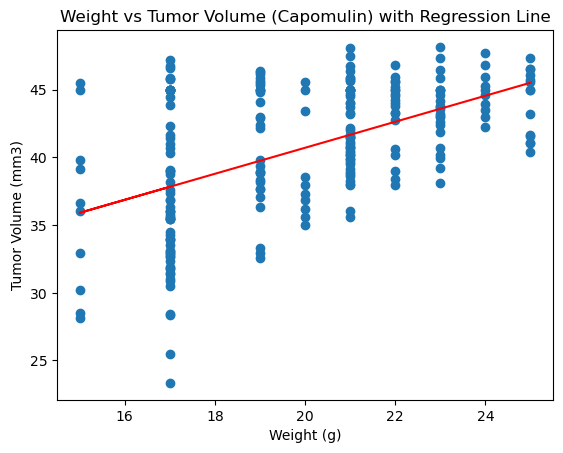

In [21]:


# Calculate correlation
correlation = capomulin_data["Weight (g)"].corr(capomulin_data["Tumor Volume (mm3)"])
print(f"Correlation coefficient: {correlation}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])

# Generate the linear regression line
regression_line = slope * capomulin_data["Weight (g)"] + intercept

# Scatter plot with regression line
plt.scatter(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])
plt.plot(capomulin_data["Weight (g)"], regression_line, color='red')
plt.title('Weight vs Tumor Volume (Capomulin) with Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


